<a href="https://colab.research.google.com/github/soroor-ag/DimRed-Learn/blob/main/pca_hw2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import dataset

In [ ]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load Fashion MNIST dataset
from tensorflow.keras.datasets import fashion_mnist

# Load data
df=fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Combine train and test data for PCA
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Flatten images to create feature vectors
X_flattened = X.reshape(X.shape[0], -1)

# Display the shape of the data
print(f"Data shape: {X_flattened.shape}")  # Should be (70000, 784)
print(f"Labels shape: {y.shape}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Data shape: (70000, 784)
Labels shape: (70000,)


In [ ]:
df

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

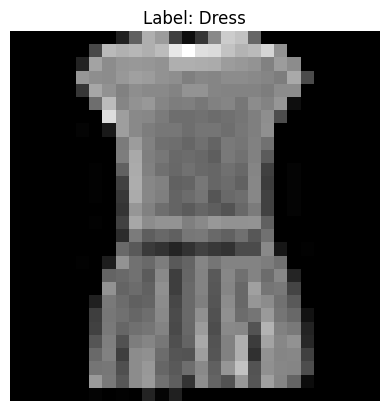

In [ ]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize a sample image
plt.imshow(X[3], cmap='gray')
plt.title(f"Label: {class_names[y[3]]}")
plt.axis('off')
plt.show()

# add noise

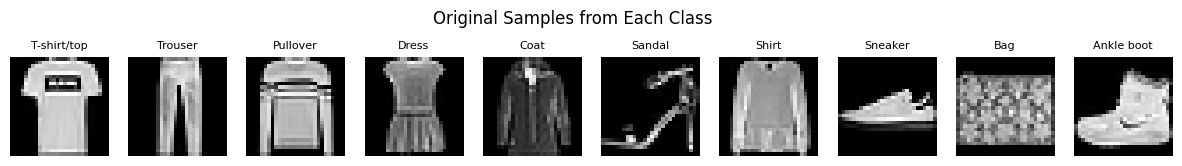

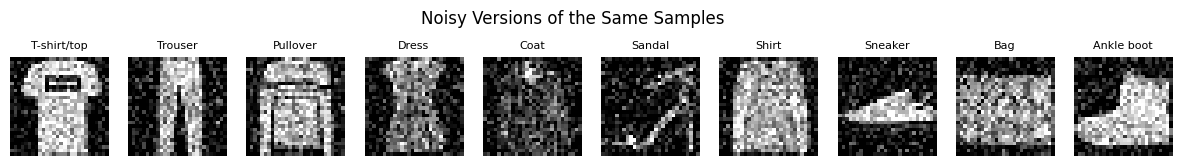

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Step 1: pick one sample from each class
sample_indices = []
for i in range(10):
    idx = np.where(y == i)[0][0]
    sample_indices.append(idx)

X_samples = X[sample_indices]
y_samples = y[sample_indices]

# Step 2: Display original samples
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_samples[i], cmap='gray')
    plt.title(class_names[y_samples[i]], fontsize=8)
    plt.axis('off')
plt.suptitle("Original Samples from Each Class")
plt.show()

# Step 3: Add Gaussian noise to the entire dataset
X_normalized = X / 255.0
noise_factor = 0.2
X_noisy = X_normalized + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_normalized.shape)
X_noisy = np.clip(X_noisy, 0., 1.)

# Select noisy versions of the same 10 samples
X_samples_noisy = X_noisy[sample_indices]

# Step 4: Display noisy samples
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_samples_noisy[i], cmap='gray')
    plt.title(class_names[y_samples[i]], fontsize=8)
    plt.axis('off')
plt.suptitle("Noisy Versions of the Same Samples")
plt.show()


# pca from scratch

In [ ]:
# Flatten noisy images for PCA
X_noisy_flat = X_noisy.reshape(70000, 784)  # shape = (70000, 784)


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_noisy_flat)

# Display the shape of the standardized data
print(f"Standardized Data Shape: {X_standardized.shape}")

Standardized Data Shape: (70000, 784)


In [ ]:
# Compute the covariance matrix
# For large datasets, it's more efficient to compute the covariance matrix using numpy's dot product
n_samples = X_standardized.shape[0]
cov_matrix = np.dot(X_standardized.T, X_standardized) / (n_samples - 1)

# Display the shape of the covariance matrix
print(f"Covariance Matrix Shape: {cov_matrix.shape}")

# Display the covariance matrix
print(f"Covariance Matrix: \n{cov_matrix}")

Covariance Matrix Shape: (784, 784)
Covariance Matrix: 
[[ 1.00001429e+00  1.94334492e-03 -3.02146776e-03 ...  5.26078609e-03
  -2.01575479e-03 -3.84405399e-03]
 [ 1.94334492e-03  1.00001429e+00  2.67292081e-03 ... -8.46947619e-03
   1.86458620e-03 -2.19905707e-03]
 [-3.02146776e-03  2.67292081e-03  1.00001429e+00 ...  1.67896104e-03
   3.71053110e-03 -3.55903200e-04]
 ...
 [ 5.26078609e-03 -8.46947619e-03  1.67896104e-03 ...  1.00001429e+00
   7.45736205e-02  7.64006625e-03]
 [-2.01575479e-03  1.86458620e-03  3.71053110e-03 ...  7.45736205e-02
   1.00001429e+00  1.51927715e-02]
 [-3.84405399e-03 -2.19905707e-03 -3.55903200e-04 ...  7.64006625e-03
   1.51927715e-02  1.00001429e+00]]


In [ ]:
# Compute eigenvalues and eigenvectors using Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(X_standardized, full_matrices=False)

# Eigenvalues are the square of singular values divided by (n_samples - 1)
eig_values = (S ** 2) / (n_samples - 1)

# Eigenvectors are the transpose of V from SVD
eig_vectors = VT.T

# Display the shape of eigenvalues and eigenvectors
print(f"Eigenvalues Shape: {eig_values.shape}")
print(f"Eigenvectors Shape: {eig_vectors.shape}")

Eigenvalues Shape: (784,)
Eigenvectors Shape: (784, 784)


In [ ]:

# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(eig_values[i], eig_vectors[:, i]) for i in range(len(eig_values))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Extract the sorted eigenvalues and eigenvectors
sorted_eig_values = np.array([eig_pair[0] for eig_pair in eig_pairs])
sorted_eig_vectors = np.array([eig_pair[1] for eig_pair in eig_pairs]).T

# Display the top 10 eigenvalues
print("Top 10 Eigenvalues:")
for i in range(10):
    print(f"Eigenvalue {i+1}: {sorted_eig_values[i]}")

Top 10 Eigenvalues:
Eigenvalue 1: 134.49394026733074
Eigenvalue 2: 84.49102826877218
Eigenvalue 3: 31.388688030619186
Eigenvalue 4: 27.366774491763067
Eigenvalue 5: 20.658882540260223
Eigenvalue 6: 18.362071152785816
Eigenvalue 7: 14.289779063479392
Eigenvalue 8: 11.69673740299892
Eigenvalue 9: 8.30220916177741
Eigenvalue 10: 6.9566878338295455


In [ ]:

# Select the top k eigenvectors (here we choose k=2 for visualization)
k = 2
matrix_w = sorted_eig_vectors[:, :k]

# Project the standardized data onto the new feature space
X_pca = X_standardized.dot(matrix_w)

# Create a DataFrame with the projected data
principal_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(k)])
principal_df['label'] = y

# Display the first 5 rows of the projected data
print("Projected Data (first 5 samples):")
print(principal_df.head())

Projected Data (first 5 samples):
         PC1        PC2  label
0  -0.153893 -18.484337      9
1 -14.943072   5.212517      0
2   9.893281   9.978258      0
3   1.433579   9.644673      3
4  -7.480225  11.479089      0


Explained Variance Ratio for Top 10 Components:
PC1: 0.1715
PC2: 0.1078
PC3: 0.0400
PC4: 0.0349
PC5: 0.0264
PC6: 0.0234
PC7: 0.0182
PC8: 0.0149
PC9: 0.0106
PC10: 0.0089


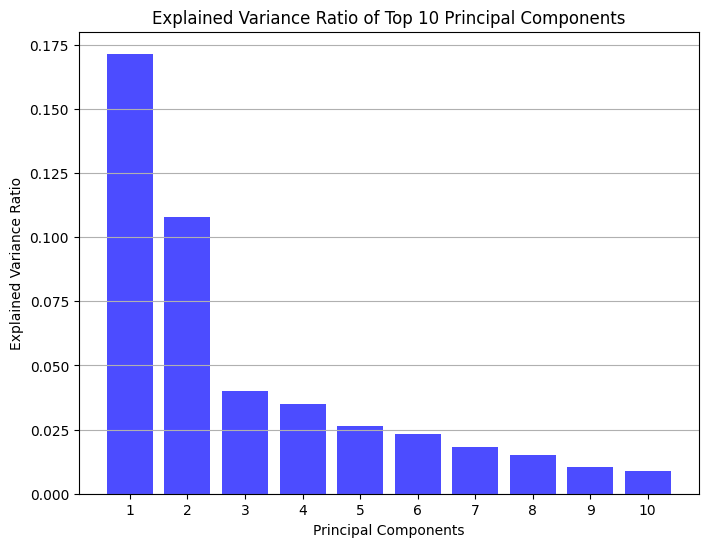

In [ ]:
# Compute the explained variance ratio
explained_variance_ratio = sorted_eig_values / np.sum(sorted_eig_values)

# Display the explained variance ratio for the top 10 components
print("Explained Variance Ratio for Top 10 Components:")
for i in range(10):
    print(f"PC{i+1}: {explained_variance_ratio[i]:.4f}")

# Plot the explained variance ratio for the top 10 components
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
components = np.arange(1, 11)
plt.bar(components, explained_variance_ratio[:10], alpha=0.7, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Top 10 Principal Components')
plt.xticks(components)
plt.grid(axis='y')
plt.show()

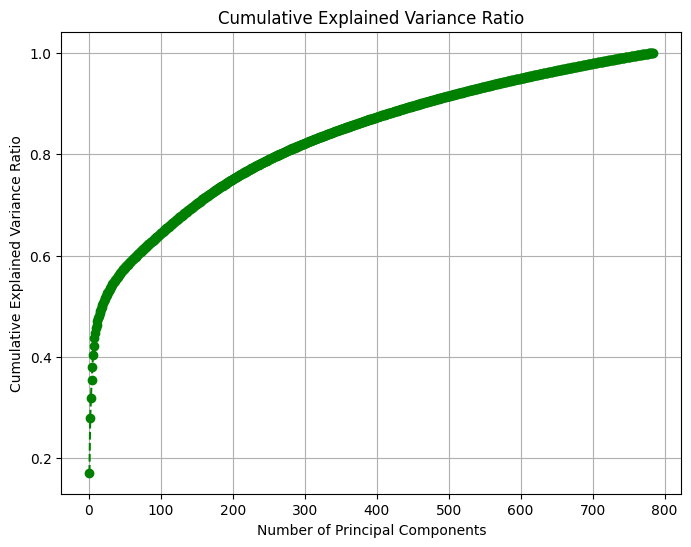

In [ ]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--', color='green')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


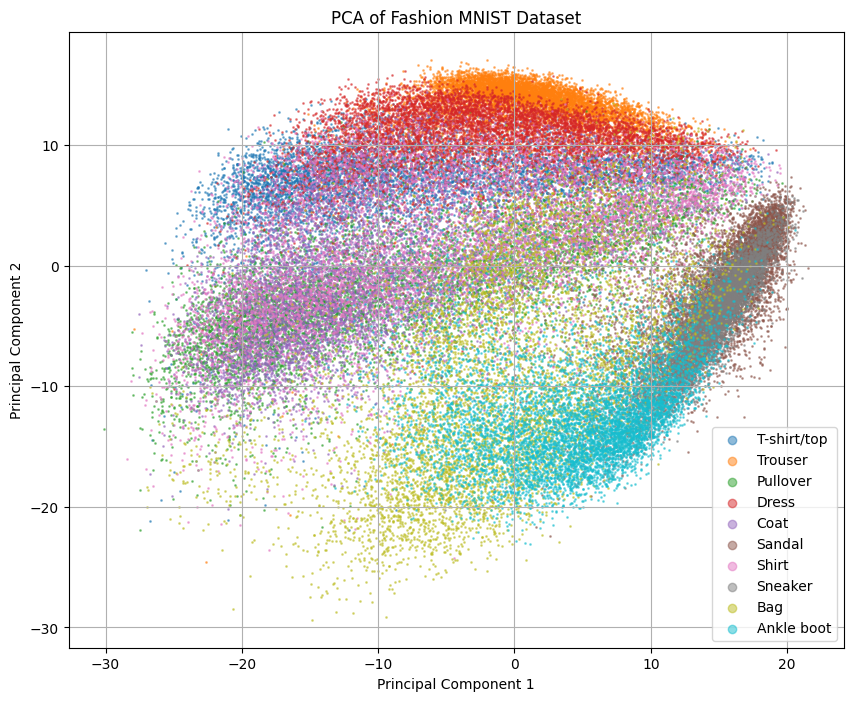

In [ ]:
# Plot the projected data
plt.figure(figsize=(10,8))

for label in np.unique(y):
    indices = principal_df['label'] == label
    plt.scatter(principal_df.loc[indices, 'PC1'],
                principal_df.loc[indices, 'PC2'],
                s=1, alpha=0.5, label=class_names[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fashion MNIST Dataset')
plt.legend(markerscale=6)
plt.grid()
plt.show()


In [ ]:
# Import PCA from scikit-learn
from sklearn.decomposition import PCA

# Initialize PCA with the desired number of components
k = 2  # Number of principal components
pca = PCA(n_components=k)

# Fit PCA on the standardized data
X_pca_sklearn = pca.fit_transform(X_standardized)

# Create a DataFrame with the projected data
principal_df_sklearn = pd.DataFrame(X_pca_sklearn, columns=[f'PC{i+1}' for i in range(k)])
principal_df_sklearn['label'] = y

# Display the explained variance ratio
print("Explained Variance Ratio by scikit-learn PCA:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f}")

Explained Variance Ratio by scikit-learn PCA:
PC1: 0.1715
PC2: 0.1078


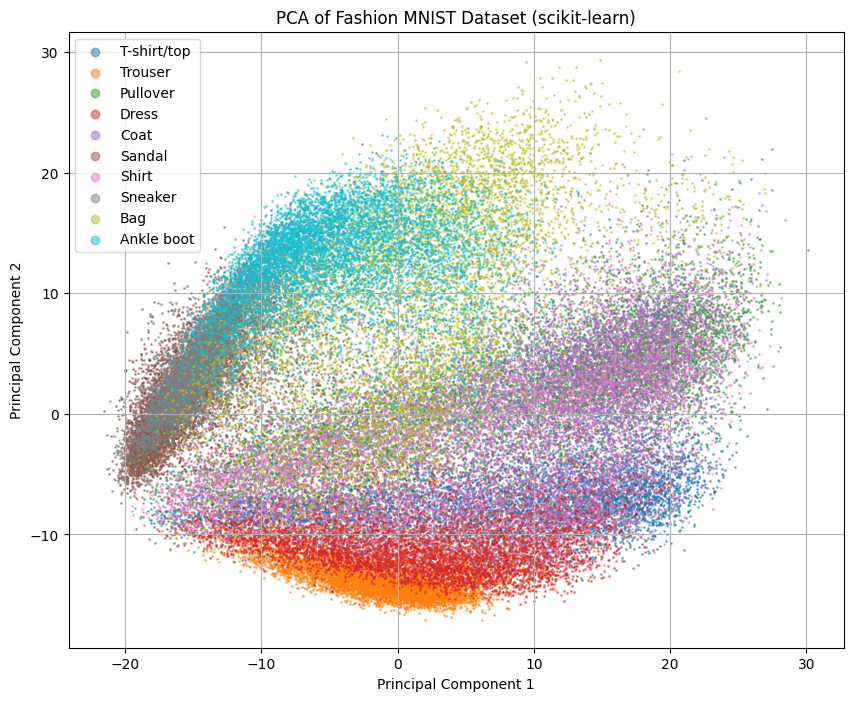

In [ ]:
# Plot the projected data using scikit-learn PCA
plt.figure(figsize=(10, 8))

# No sampling - use the entire dataset
for label in np.unique(principal_df_sklearn['label']):
    label_indices = principal_df_sklearn['label'] == label
    plt.scatter(principal_df_sklearn.loc[label_indices, 'PC1'],
                principal_df_sklearn.loc[label_indices, 'PC2'],
                s=1, alpha=0.5, label=class_names[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fashion MNIST Dataset (scikit-learn)')
plt.legend(markerscale=6)
plt.grid()
plt.show()

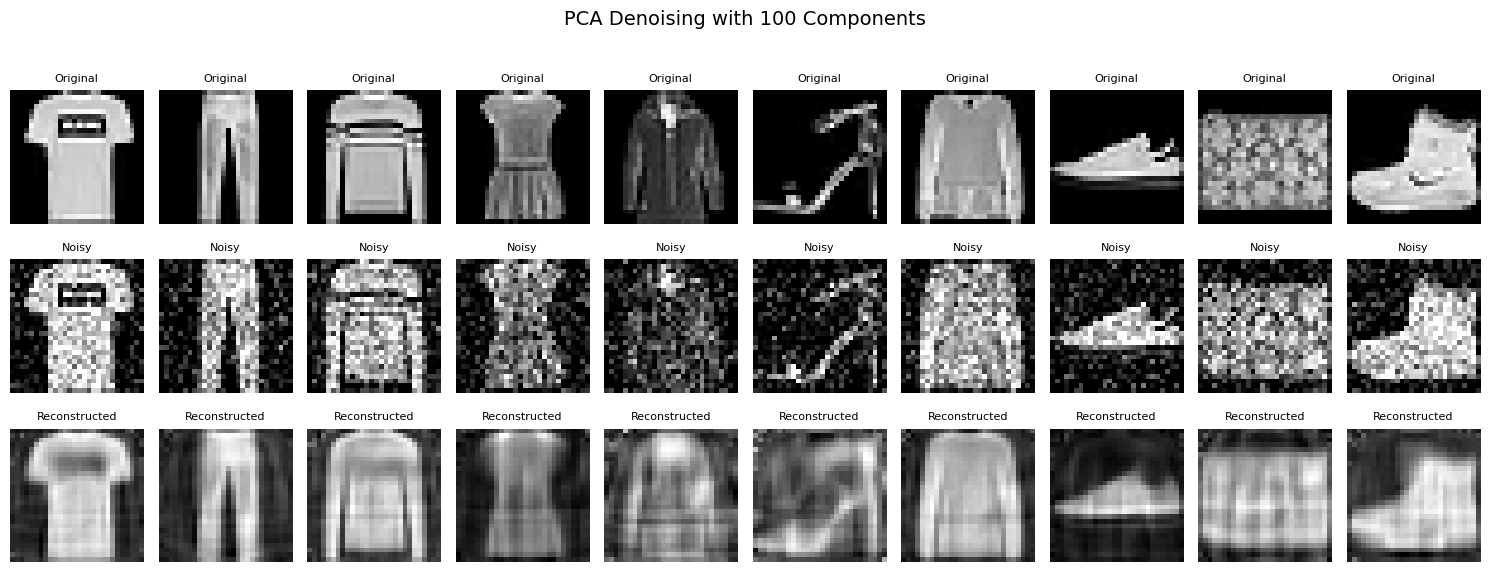

In [ ]:
# Choose number of components for denoising (e.g., 100 is a good starting point)
k_denoise = 100
matrix_w_denoise = sorted_eig_vectors[:, :k_denoise]

# Project the noisy standardized data to PCA subspace
X_pca_denoised = X_standardized.dot(matrix_w_denoise)

# Reconstruct the standardized data from PCA space
X_reconstructed_standardized = X_pca_denoised.dot(matrix_w_denoise.T)

# Inverse transform the standardization
X_reconstructed = scaler.inverse_transform(X_reconstructed_standardized)

# Reshape back to image format
X_reconstructed_images = X_reconstructed.reshape(-1, 28, 28)

# Select reconstructed versions of the same 10 samples
X_samples_reconstructed = X_reconstructed_images[sample_indices]

# ------------------------- Plot All Together -------------------------

plt.figure(figsize=(15, 6))

for i in range(10):
    # Original
    plt.subplot(3, 10, i + 1)
    plt.imshow(X_samples[i], cmap='gray')
    plt.title("Original", fontsize=8)
    plt.axis('off')

    # Noisy
    plt.subplot(3, 10, i + 11)
    plt.imshow(X_samples_noisy[i], cmap='gray')
    plt.title("Noisy", fontsize=8)
    plt.axis('off')

    # Reconstructed
    plt.subplot(3, 10, i + 21)
    plt.imshow(X_samples_reconstructed[i], cmap='gray')
    plt.title("Reconstructed", fontsize=8)
    plt.axis('off')

plt.suptitle(f"PCA Denoising with {k_denoise} Components", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


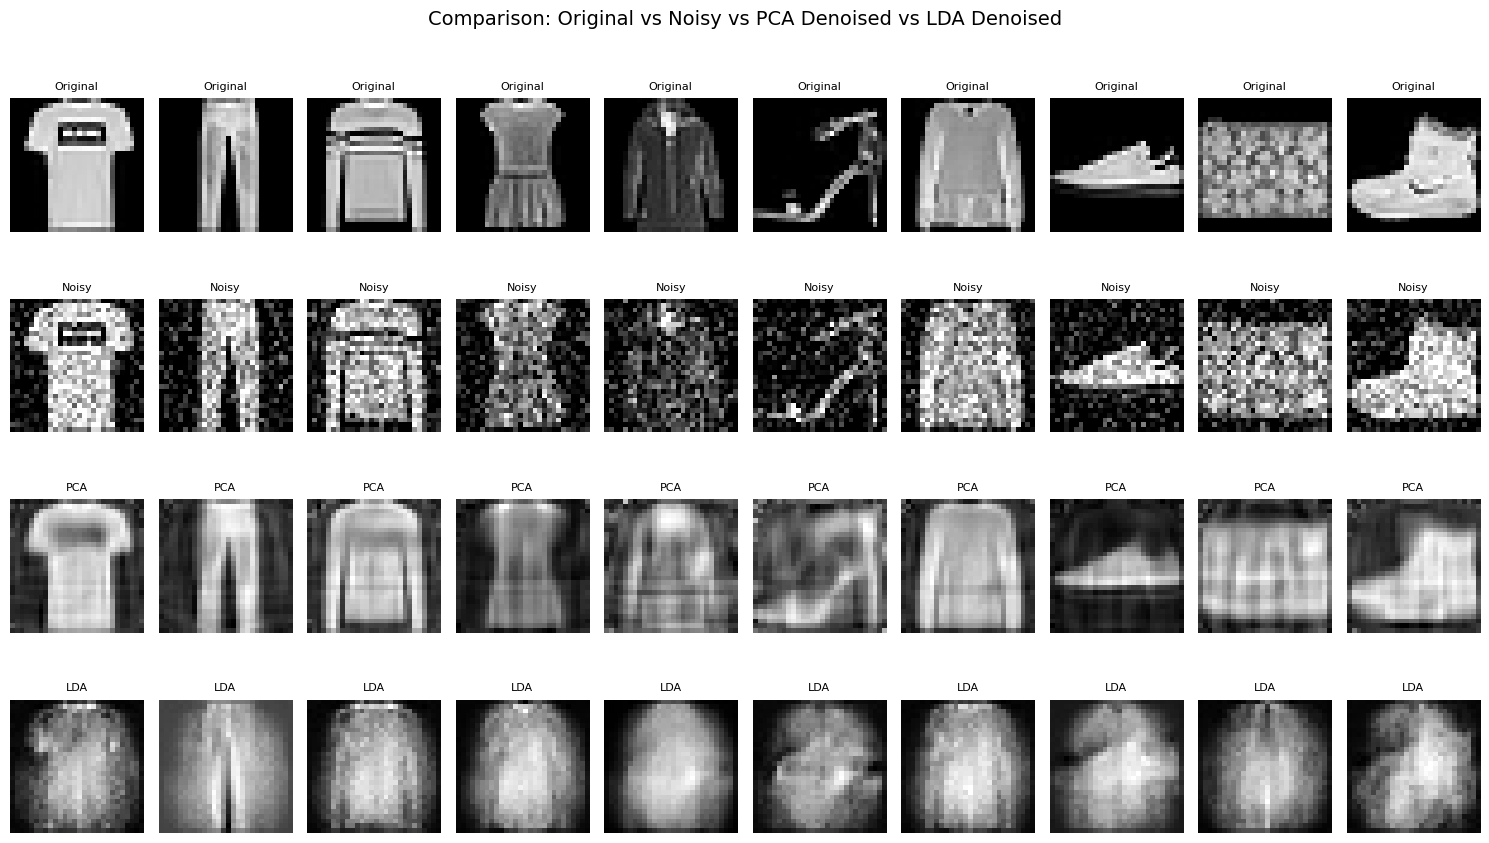

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Step 1: Fit LDA on standardized noisy data
lda = LinearDiscriminantAnalysis(n_components=9)
X_lda = lda.fit_transform(X_standardized, y)

# Step 2: Reconstruct back to original space using pseudo-inverse
X_reconstructed_lda_std = X_lda.dot(lda.scalings_.T)

# Step 3: Inverse transform the standardization
X_reconstructed_lda = scaler.inverse_transform(X_reconstructed_lda_std)

# Step 4: Reshape to images
X_reconstructed_lda_images = X_reconstructed_lda.reshape(-1, 28, 28)
X_samples_lda = X_reconstructed_lda_images[sample_indices]

# ------------------------- Compare PCA vs LDA -------------------------

plt.figure(figsize=(15, 9))

for i in range(10):
    # Original
    plt.subplot(4, 10, i + 1)
    plt.imshow(X_samples[i], cmap='gray')
    plt.title("Original", fontsize=8)
    plt.axis('off')

    # Noisy
    plt.subplot(4, 10, i + 11)
    plt.imshow(X_samples_noisy[i], cmap='gray')
    plt.title("Noisy", fontsize=8)
    plt.axis('off')

    # PCA Reconstructed
    plt.subplot(4, 10, i + 21)
    plt.imshow(X_samples_reconstructed[i], cmap='gray')
    plt.title("PCA", fontsize=8)
    plt.axis('off')

    # LDA Reconstructed
    plt.subplot(4, 10, i + 31)
    plt.imshow(X_samples_lda[i], cmap='gray')
    plt.title("LDA", fontsize=8)
    plt.axis('off')

plt.suptitle("Comparison: Original vs Noisy vs PCA Denoised vs LDA Denoised", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


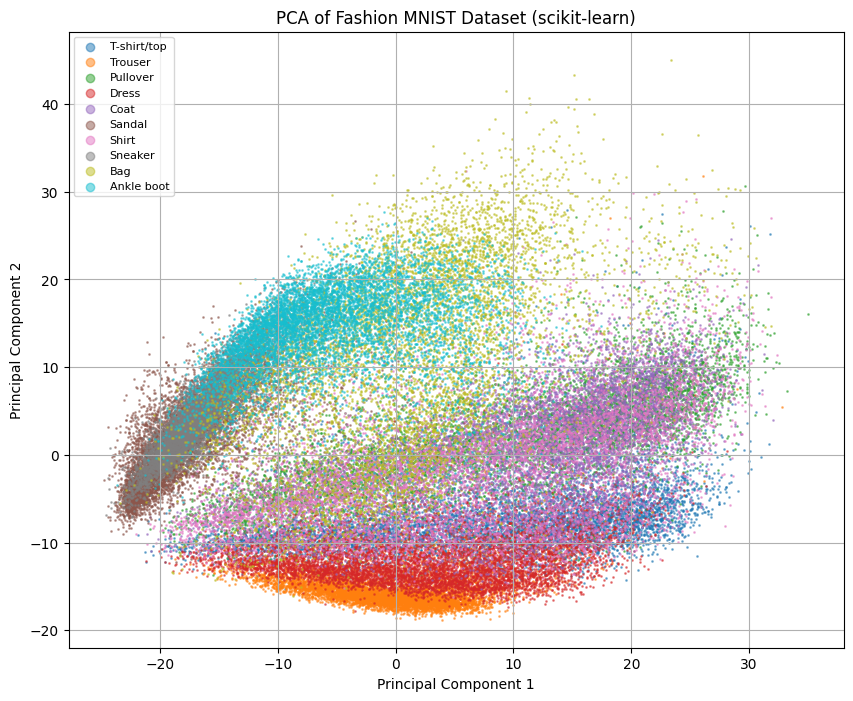

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd

# Load Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X = np.concatenate([X_train, X_test], axis=0).reshape(-1, 28*28)
y = np.concatenate([y_train, y_test], axis=0)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------- PCA Projection ----------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for plotting
principal_df_sklearn = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
principal_df_sklearn['label'] = y

# Plot PCA result
plt.figure(figsize=(10, 8))
for label in np.unique(principal_df_sklearn['label']):
    label_indices = principal_df_sklearn['label'] == label
    plt.scatter(principal_df_sklearn.loc[label_indices, 'PC1'],
                principal_df_sklearn.loc[label_indices, 'PC2'],
                s=1, alpha=0.5, label=class_names[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fashion MNIST Dataset (scikit-learn)')
plt.legend(markerscale=6, fontsize=8)
plt.grid()
plt.show()


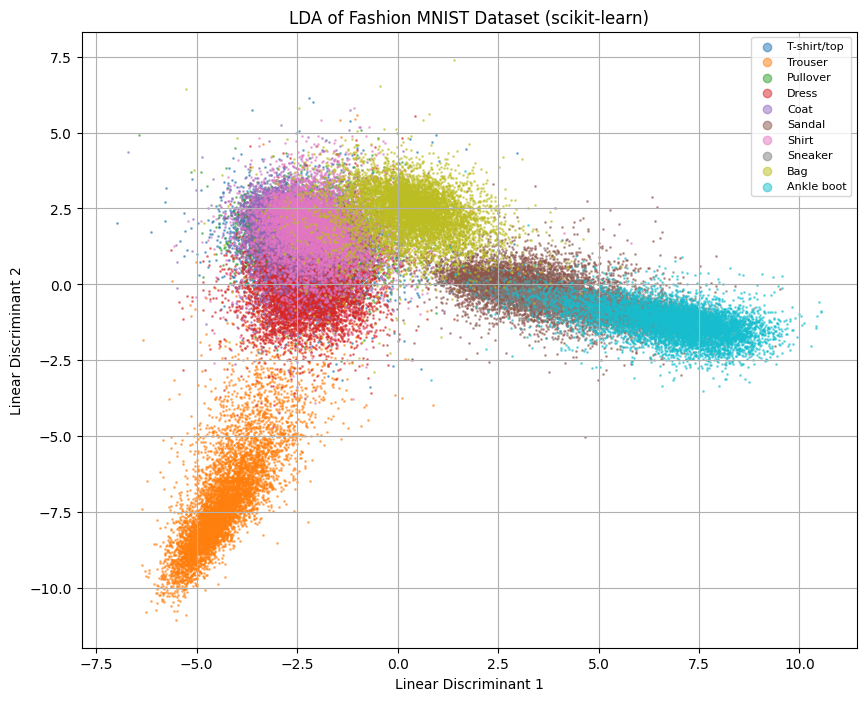

In [ ]:
# ---------------------- LDA Projection ----------------------
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Create DataFrame for plotting
lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
lda_df['label'] = y

# Plot LDA result
plt.figure(figsize=(10, 8))
for label in np.unique(lda_df['label']):
    label_indices = lda_df['label'] == label
    plt.scatter(lda_df.loc[label_indices, 'LD1'],
                lda_df.loc[label_indices, 'LD2'],
                s=1, alpha=0.5, label=class_names[label])

plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('LDA of Fashion MNIST Dataset (scikit-learn)')
plt.legend(markerscale=6, fontsize=8)
plt.grid()
plt.show()


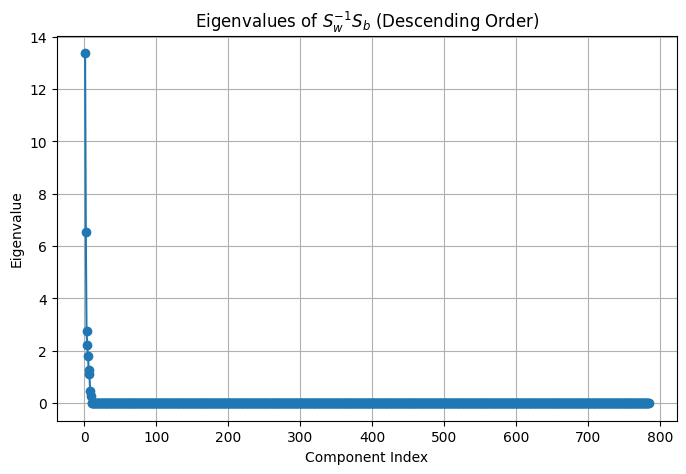

In [ ]:
# --------- Compute and Plot Eigenvalues of Sw^-1 Sb for LDA ---------
import numpy as np
import matplotlib.pyplot as plt

# Compute overall mean
mean_overall = np.mean(X_scaled, axis=0)
n_features = X_scaled.shape[1]
classes = np.unique(y)

# Initialize scatter matrices
S_w = np.zeros((n_features, n_features))
S_b = np.zeros((n_features, n_features))

# Compute within-class and between-class scatter matrices
for c in classes:
    X_c = X_scaled[y == c]
    mean_c = np.mean(X_c, axis=0)
    n_c = X_c.shape[0]

    S_w += (X_c - mean_c).T @ (X_c - mean_c)
    mean_diff = (mean_c - mean_overall).reshape(-1, 1)
    S_b += n_c * (mean_diff @ mean_diff.T)

# Compute eigenvalues of Sw^-1 Sb
eigvals, _ = np.linalg.eig(np.linalg.pinv(S_w).dot(S_b))
eigvals = np.real(eigvals)
sorted_eigvals = np.sort(eigvals)[::-1]

# Plot eigenvalues in descending order
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(sorted_eigvals)+1), sorted_eigvals, marker='o')
plt.title('Eigenvalues of $S_w^{-1} S_b$ (Descending Order)')
plt.xlabel('Component Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 0 32 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 0 32 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 0 32 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarnin

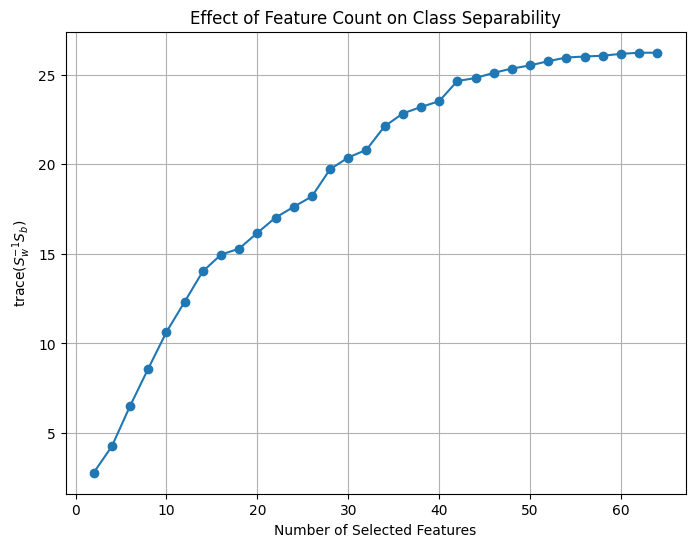

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, f_classif

# استفاده از داده digits برای نمونه؛ شما می‌توانید آن را با داده‌ی خودتان جایگزین کنید
digits = load_digits()
X, y = digits.data, digits.target

# استانداردسازی
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# محدوده‌ای از تعداد ویژگی‌ها برای بررسی
feature_counts = range(2, X.shape[1] + 1, 2)
traces = []

for k in feature_counts:
    # انتخاب k ویژگی برتر با ANOVA
    selector = SelectKBest(score_func=f_classif, k=k)
    X_selected = selector.fit_transform(X_scaled, y)

    # محاسبه‌ی میانگین کلی
    mean_overall = np.mean(X_selected, axis=0)
    classes = np.unique(y)
    n_features = X_selected.shape[1]
    S_w = np.zeros((n_features, n_features))
    S_b = np.zeros((n_features, n_features))

    for c in classes:
        X_c = X_selected[y == c]
        mean_c = np.mean(X_c, axis=0)
        n_c = X_c.shape[0]

        S_w += (X_c - mean_c).T @ (X_c - mean_c)
        mean_diff = (mean_c - mean_overall).reshape(-1, 1)
        S_b += n_c * (mean_diff @ mean_diff.T)

    # محاسبه trace(Sw^-1 Sb)
    Sw_inv_Sb = np.linalg.pinv(S_w) @ S_b
    trace_val = np.trace(Sw_inv_Sb)
    traces.append(trace_val)

# رسم نمودار
plt.figure(figsize=(8, 6))
plt.plot(feature_counts, traces, marker='o')
plt.xlabel("Number of Selected Features")
plt.ylabel("trace($S_w^{-1} S_b$)")
plt.title("Effect of Feature Count on Class Separability")
plt.grid(True)
plt.show()
